In [7]:
import numpy as np
import gym
import random
import time
import math
from IPython.display import clear_output
from matplotlib import pyplot as plot
import numpy as np
from IPython import display

# Problem formulation

We have the character Harry Potter who is going to rescue his uncle Sirius who is locked up in the prison of Azkaban, for this problem we have the characters on a board of size 9 X 7, the objective of the problem is that Harry has to get to where Sirius is, but for this he has to cross an area of the board where there are strong winds which blow from south to north, which occupies three columns of the board, which would be thecolumn 3,4,5, each column has a different intensity.

column 3 has a probability of 0.2 that it can send Harry one square to the north, column 4 has a probability of 0.3 that it can finish two squares to the north and finally column 5 has a probability of 0.25 that it can finish one square to the north.


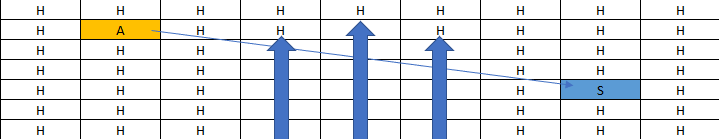

In [5]:
display.Image("./assets/map.png")

# Solution Explanation

As part of the solution, the board was first transferred to a matrix where Harry's and his uncle Sirius' positions are represented.


In [8]:
harry =[1,1] 
sirius= [7,4]
matriz = [["H","H","H","H","H","H","H","H","H"],
          ["H","A","H","H","H","H","H","H","H"],
          ["H","H","H","H","H","H","H","H","H"],
          ["H","H","H","H","H","H","H","H","H"],
          ["H","H","H","H","H","H","H","S","H"],
          ["H","H","H","H","H","H","H","H","H"],
          ["H","H","H","H","H","H","H","H","H"]]
matriz

[['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'],
 ['H', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'H'],
 ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'],
 ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'],
 ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'H'],
 ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'],
 ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']]

Subsequently there is a function which is responsible for moving a box to Harry Potter in the four directions that you have that in this case is Left, Right, Up, Down, in this function moves the character and its position is updated, then ask if Harry is in any of the three columns where the wind is blowing, if this is the calculation of the probability is performed with the following formula:
1-(1/math.sqrt(random.randint(0, 10)))

With which we obtain a value and compare it with the probability of each column previously mentioned, if the value is equal the conditions are applied and harry is moved one or two squares to the north respectively according to the column in which he is, if the probabilities are not equal, harry stays in the same place. 
subsequently a reward is returned which is zero if he is still on the board and 10 when he finds his Uncle Sirius, a new state and a done is also returned.

In [13]:
def HarryPotter(accion):
    rewart=0
    done=False
    new_state=0
    if(accion == 0):
        matriz[harry[1]][harry[0]]="H"
        matriz[harry[1]][harry[0]-1]="A"
        harry[0] -= 1
    if(accion == 1):
        matriz[harry[1]][harry[0]]="H"
        matriz[harry[1]][harry[0]+1]="A"
        harry[0] += 1
    if(accion == 2):
        matriz[harry[1]][harry[0]]="H"
        matriz[harry[1]-1][harry[0]]="A"
        harry[1] -= 1
    if(accion == 3):
        matriz[harry[1]][harry[0]]="H"
        matriz[harry[1]+1][harry[0]]="A"
        harry[1] += 1
    if(harry[0] == 3):
        a= 1-(1/math.sqrt(random.randint(0, 10)))
        a="{0:.1f}".format(a)
        if(a==0.3):
            matriz[harry[1]][harry[0]]="H"
            matriz[harry[1]-1][harry[0]]="A"
            harry[1] -= 1
    if(harry[0] == 4):
        a= 1-(1/math.sqrt(random.randint(0, 10)))
        a="{0:.2f}".format(a)
        if(a==0.25):
            matriz[harry[1]][harry[0]]="H"
            matriz[harry[1]-2][harry[0]]="A"
            harry[1] -= 2
    
    if(harry[0] == 5):
        a= 1-(1/math.sqrt(random.randint(0, 10)))
        a="{0:.2f}".format(a)
        if(a==0.25):
            matriz[harry[1]][harry[0]]="H"
            matriz[harry[1]-1][harry[0]]="A"
            harry[1] -= 1
    
    if(harry==sirius):
        rewart= 10
        done=True
    new_state= random.randint(0, 10)
    return new_state,rewart,done,1

In this part we have the variables that we will use later, we have:
 - action space size: this is the number of actions that are available.
 - size of the state space: this is the number of squares on the board.
 - action : This is an array with the available actions.

In [14]:
action_space_size = 4
state_space_size = 63
action_def =["izquierda","derecha","arriba","abajo"]
action =[0,1,2,3]

 - Number of episodes: the number of times the training will be run
 - maximum steps you can take in an episode: you are limiting the number of steps you can take in an episode.


In [15]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.2
discount_rate = 0.95

rewards_avg = []

q_table = np.zeros((state_space_size, action_space_size))


In this part of the code we made some modifications to what we had so that it can work with the code that moved Harry Potter, in this case we no longer use the gym library, but it is leading to a function that returns the necessary values for the calculations.

In [19]:
# This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that
# shows how the agent learn how to maximize the reward.
for it in range(100):
    print('average ', it)
    rewards_all_episodes=[]
    
    # exporation-exploitation trade-off params
    exploration_rate = 1
    max_exploration_rate = 1
    min_exploration_rate = 0.01
    exploration_decay_rate = 0.005
    
    # init q table in zeros
    q_table = np.zeros((state_space_size, action_space_size))

    # iterate over the episodes
    for episode in range(num_episodes):
        state = 0
        done = False
        rewards_current_episode = 0
        
        # iterate over the steps for an episode
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:])
            else:
                action = random.randint(0, 4)

            # Take action
            new_state, reward, done, info = HarryPotter(action)
            # Update Q-table for Q(s,a)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
            # transition next state
            state = new_state
            rewards_current_episode += reward

            if done == True: 
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

        rewards_all_episodes.append(rewards_current_episode)
    rewards_avg.append(rewards_all_episodes)

average  0


IndexError: index 4 is out of bounds for axis 1 with size 4

In [ ]:

x = [i for i in range(0,num_episodes)]
y = np.mean(rewards_avg, axis=0)
plot.xlabel('Episodes')
plot.ylabel('Reward')
plot.plot(x, y,'o')

It shows the Q Table with its values already updated.

In [ ]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)

in this last part we run the model and it should print the matrix in each movement it makes so that we can visualize the movement Harry

In [ ]:
for episode in range(3):
    state = 0
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = HarryPotter(accion)
        
        if done:
            clear_output(wait=True)
            matriz #Se mostraria la matiz con el siguiente movimiento
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        state = new_state
        env.close()